In [1]:
import sys
sys.path.append('../python')

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

from machine_learning import *
from notebook_network_size import find_best_network_size_notebook, try_best_network_sizes
from train_single_network import train_single_network
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
data = []
with open('../SOD_MC_DATA.dat', 'r') as inputfile:
    for l in inputfile:
        data.append([float(x) for x in l.split(',')])
data = np.array(data)

parameters = data[:,:6]
samples = data[:,6:]

In [3]:
epochs = 500000
network = [10, 10, 10, 10, 10,1]

# Network sizes


Config 4 x 6 ([0 x 0] / [5 x 5])
Training and postprocessing took: 14.70559024810791 seconds (0.24509317080179852 minutes) (0.0040848861800299755 hours)
Config 4 x 12 ([0 x 1] / [5 x 5])
Training and postprocessing took: 13.278892755508423 seconds (0.2213148792584737 minutes) (0.003688581320974562 hours)
Config 4 x 24 ([0 x 2] / [5 x 5])
Training and postprocessing took: 18.641268968582153 seconds (0.31068781614303587 minutes) (0.005178130269050598 hours)
Config 4 x 48 ([0 x 3] / [5 x 5])
Training and postprocessing took: 30.657490015029907 seconds (0.5109581669171651 minutes) (0.00851596944861942 hours)
Config 4 x 96 ([0 x 4] / [5 x 5])
Training and postprocessing took: 36.170305490493774 seconds (0.6028384248415629 minutes) (0.010047307080692715 hours)
Config 8 x 6 ([1 x 0] / [5 x 5])
Training and postprocessing took: 38.89561486244202 seconds (0.6482602477073669 minutes) (0.010804337461789448 hours)
Config 8 x 12 ([1 x 1] / [5 x 5])
Training and postprocessing took: 49.5935606956481

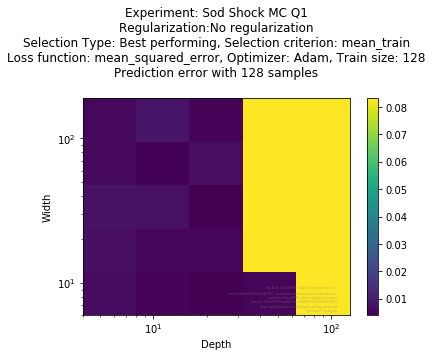

Memory usage: 7576768
all_errors_map[Error mean]=\ 
[[3.56680190e-04 7.65041509e-04 1.13259314e-04 3.82635730e-04
  1.18959011e-04]
 [4.03768451e-04 7.49398175e-05 2.72162779e-05 2.53033405e-04
  2.95912659e-04]
 [5.70374958e-04 1.49170894e-03 5.91858429e-04 5.34861466e-04
  3.94210498e-04]
 [6.95242151e-04 1.16562843e-02 1.16559335e-02 1.16360284e-02
  1.16555828e-02]
 [1.16562843e-02 1.16562843e-02 1.16562843e-02 1.16562843e-02
  1.16561089e-02]]


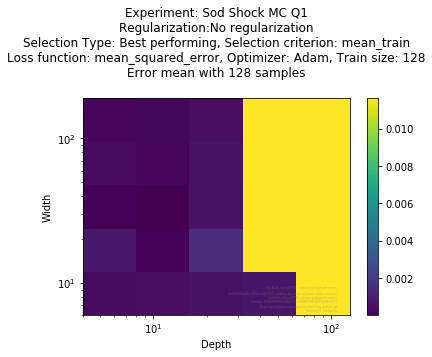

Memory usage: 7576772
all_errors_map[Error variance]=\ 
[[0.00303164 0.00227618 0.01739469 0.0080328  0.01268816]
 [0.02157626 0.03039816 0.00226049 0.01228464 0.02834941]
 [0.00222507 0.02494343 0.00161392 0.00330281 0.01499111]
 [0.00884713 1.0000524  0.99996154 0.99999708 0.99998834]
 [0.99997396 1.0000524  1.0000524  1.0000524  1.00003639]]


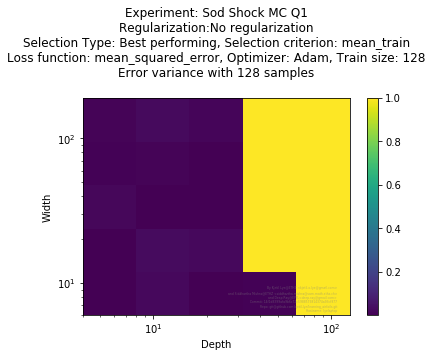

Memory usage: 7576776
all_errors_map[Wasserstein]=\ 
[[0.00162415 0.00149189 0.00109328 0.00123935 0.0010705 ]
 [0.00201505 0.00120418 0.00114338 0.00115858 0.00141304]
 [0.00146662 0.00160756 0.00102104 0.00104233 0.0011218 ]
 [0.00131761 0.04786899 0.04786873 0.04784858 0.04786895]
 [0.047869   0.04786899 0.04786899 0.04786899 0.04786898]]


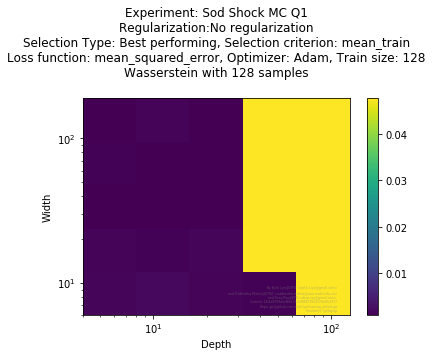

Memory usage: 7576824
all_errors_map[Selection error (mean_train)]=\ 
[[0.03761911 0.02601946 0.01801307 0.01952324 0.01738282]
 [0.03046395 0.01559748 0.02055586 0.01143977 0.02479659]
 [0.01837474 0.10743976 0.02084267 0.01131573 0.03471089]
 [0.03554869 0.57074955 0.5707392  0.56925161 0.57071351]
 [0.57075131 0.57074961 0.57074955 0.57074955 0.57073759]]


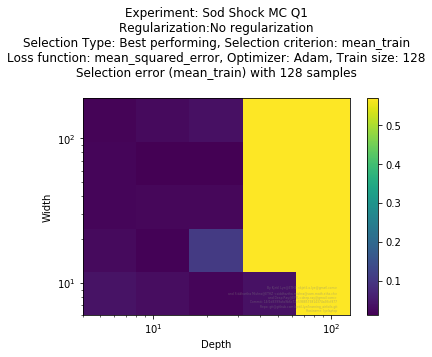

Memory usage: 7576868


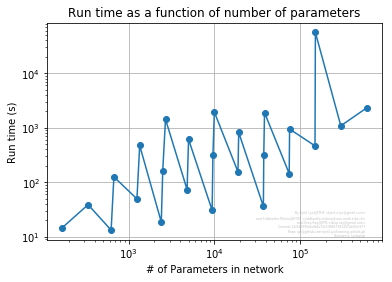

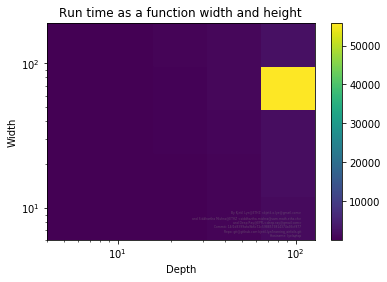

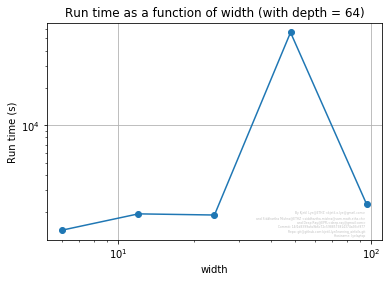

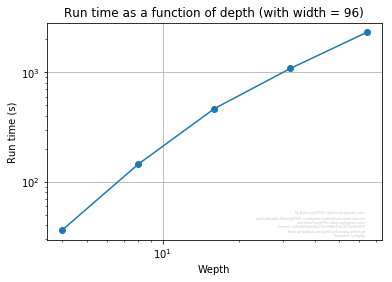

Config 4 x 6 ([0 x 0] / [5 x 5])


OSError: [Errno 12] Cannot allocate memory

In [4]:
func_names=['Q1', 'Q2', 'Q3']

for n, func_name in enumerate(func_names):
    display(HTML("<h1>%s</h1>"% func_name))
    try_best_network_sizes(parameters=parameters, 
                           samples=samples[:,n], 
                           base_title='Sod Shock MC %s' % func_name,
                          epochs=epochs)

# Single network

In [ ]:
func_names=['Q1', 'Q2', 'Q3']


for n, func_name in enumerate(func_names):
    display(HTML("<h1>%s</h1>"% func_name))
    train_single_network(parameters=parameters, 
                         samples=samples[:,n], 
                         base_title='Sod Shock MC %s' % func_name,
                         network = network,
                         epochs=epochs, 
                         large_integration_points = None,
                         sampling_method='MC')